In [1]:
import numpy as np
import pandas as pd

In [2]:
# loading data from csv file to a dataframe.
data = pd.read_csv('spam.csv',encoding_errors='ignore')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


The three unnamed columns are mostly nan values and it will not contribute much to the project.
Thats why we should drop them.

In [6]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Target has text values. We will use labelencoder to convert it to numbers so we can use it in model.


Ham --> 0

Spam --> 1

In [9]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [10]:
data['target'] = encode.fit_transform(data['target'])

In [11]:
data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will _ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


There are no missing values in the data.

In [12]:
data.isnull().sum()

target    0
text      0
dtype: int64

But there some duplicates in data and we have to remove them.

In [13]:
data.duplicated().sum()

404

In [14]:
data = data.drop_duplicates(keep='first')
data.duplicated().sum()

0

In [15]:
data.shape

(5168, 2)

# E.D.A.

As there are only two columns in the data we can perform a good level of EDA to understand the data.

This shows the proportion of valid messages and spam messages.

In [16]:
data.groupby('target').count()

,text
target,
0,4516
1,652


In [17]:
import matplotlib.pyplot as plt

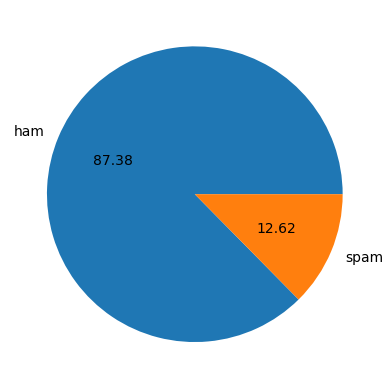

In [18]:
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

This clearly shows that the data is highly imbalanced as there are 87% valid text and only,
12% text are spam.

In [19]:
# Creating a new column - characters.
data['characters'] = data['text'].apply(len)

C:\Users\Aadi.AADI-PC\AppData\Local\Temp\ipykernel_2860\526968582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['characters'] = data['text'].apply(len)


In [20]:
data.head()

,target,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
import nltk

In [22]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Error loading punkt: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


False

In [23]:
# Creating a new column - words.
data['words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Aadi.AADI-PC\AppData\Local\Temp\ipykernel_2860\3301910795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [24]:
data.head()

,target,text,characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
# Similarly, a column of sentences.
data['sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Aadi.AADI-PC\AppData\Local\Temp\ipykernel_2860\1638961047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [26]:
data.head()

,target,text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
data[['characters','words','sentences']].describe()

,characters,words,sentences
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.441176,1.966331
std,58.104099,13.327587,1.449367
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


This shows different values for valid (ham) messages.

In [28]:
data[data['target'] == 0][['characters','words','sentences']].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.344110,17.108946,1.819973
std,56.328803,13.494730,1.383228
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


This shows different values for spam messages.This shows that ham messages have comparatively lest characters, words and sentences than spam messages.

In [29]:
data[data['target'] == 1][['characters','words','sentences']].describe()

,characters,words,sentences
count,652.000000,652.000000,652.000000
mean,137.047546,27.668712,2.980061
std,29.937352,7.015283,1.491780
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<Axes: xlabel='characters', ylabel='Count'>

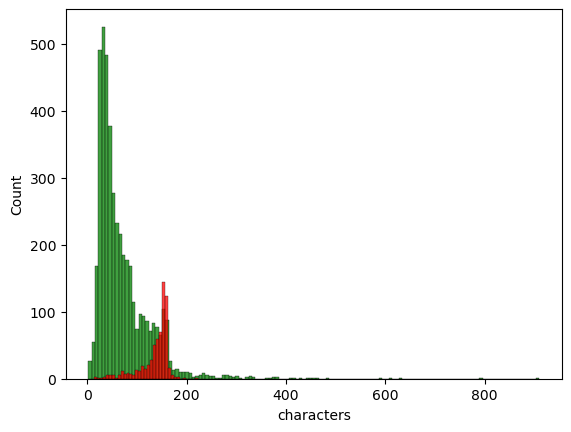

In [31]:
sns.histplot(data[data['target'] == 0 ]['characters'],color='green')
sns.histplot(data[data['target'] == 1 ]['characters'],color='red')

<Axes: xlabel='words', ylabel='Count'>

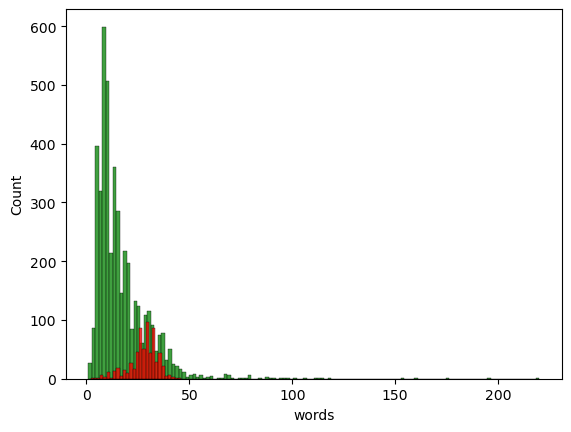

In [32]:
sns.histplot(data[data['target'] == 0 ]['words'],color='green')
sns.histplot(data[data['target'] == 1 ]['words'],color='red')

C:\Users\Aadi.AADI-PC\miniconda3\envs\venv\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


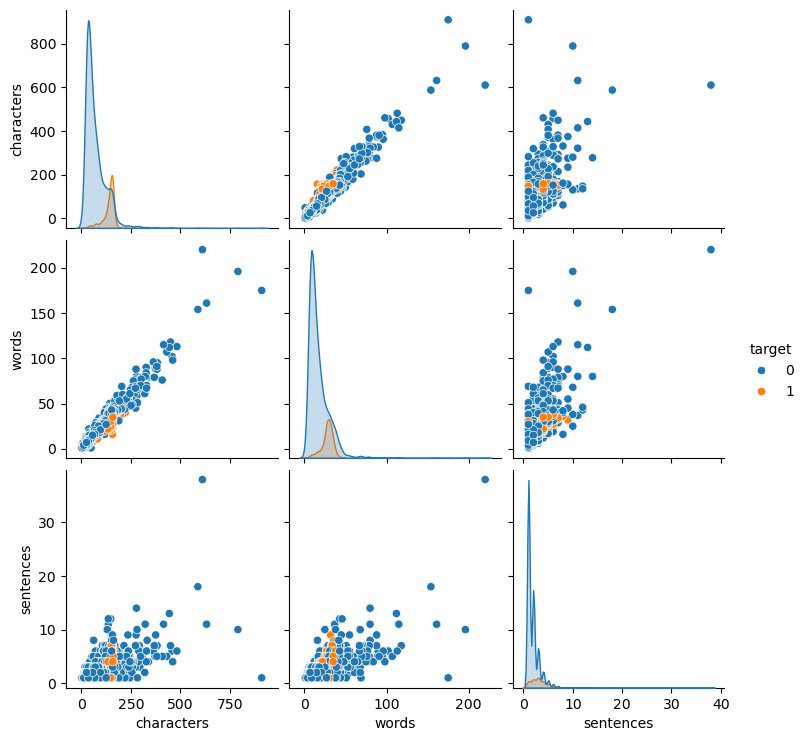

In [33]:
sns.pairplot(data,hue='target')

There are definately some outliers in this data.

In [34]:
new_data = data.drop(columns=['text'])
new_data

,target,characters,words,sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,159,35,4
5568,0,36,9,1
5569,0,57,15,2
5570,0,125,27,1


In [35]:
# Correlation between characters,words,sentences and output.
new_data.corr()

,target,characters,words,sentences
target,1.000000,0.381208,0.263101,0.265786
characters,0.381208,1.000000,0.966336,0.624425
words,0.263101,0.966336,1.000000,0.680239
sentences,0.265786,0.624425,0.680239,1.000000


<Axes: >

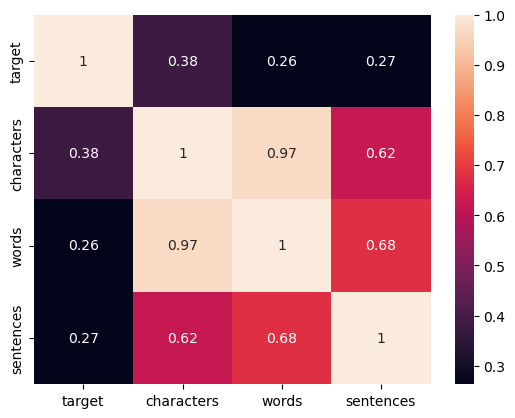

In [36]:
sns.heatmap(new_data.corr(),annot=True)

Above heatmap shows that characters has good corelation with target column, but there is also multicolinearity in data as as characters has strong corelation with words and sentences which is obvious.

# 3. Data Preprocessing

The Data received as input can not be directly used in model, so we have to preprocess the data. It contains steps like converting into lowercase, remove punctuations and unneccesary words from data and also stemming (converting data into abstract from i.e. go, going, gone -> go).

In [37]:
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [38]:
import string

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [40]:
def transform_text(text):
    # lowercase.
    text = text.lower()
    # tokenization.
    text = nltk.word_tokenize(text)
    # removing special characters.
    ans = []
    for i in text:
        if i.isalnum():
            ans.append(i)
    
    # storing in text.
    text = ans[:]
    ans.clear()
    # removing stopwords and punctuations.
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            ans.append(i)
            
    text = ans[:]
    ans.clear()
    # stemming.
    for i in text:
        ans.append(ps.stem(i))
        
    return ' '.join(ans)

Above function (Transform_text) will take an input text and perform these operations on it :-


1. Convert it into lowercase.
2. Tokenize the sentence (converting into list of words).
3. Remove special characters.
4. Remove punctuations (,.!) and stopwords (and,the,i,you,we).

In [41]:
transform_text('hello I love the youtube lectures about machine learning what about you')

'hello love youtub lectur machin learn'

In [42]:
# Checking function on a random text sample from data.
transform_text(data['text'][100])

'okay name ur price long legal wen pick u ave x am xx'

In [43]:
# Applying function on the text in data.
data['transformed_text'] = data['text'].apply(transform_text)

C:\Users\Aadi.AADI-PC\AppData\Local\Temp\ipykernel_2860\3492797840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text'] = data['text'].apply(transform_text)


In [44]:
data.head()

,target,text,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
spam_wc = wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

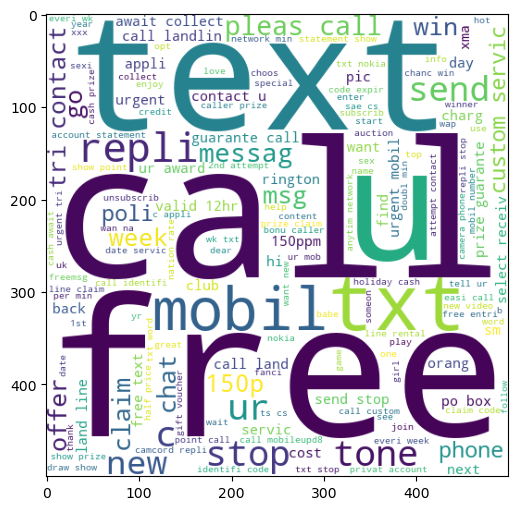

In [47]:
# Most frequent words in spam messages.
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

As above image shows, most common words in spam messages are 'text','free','call','offer','claim'.

In [48]:
ham_wc = wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))

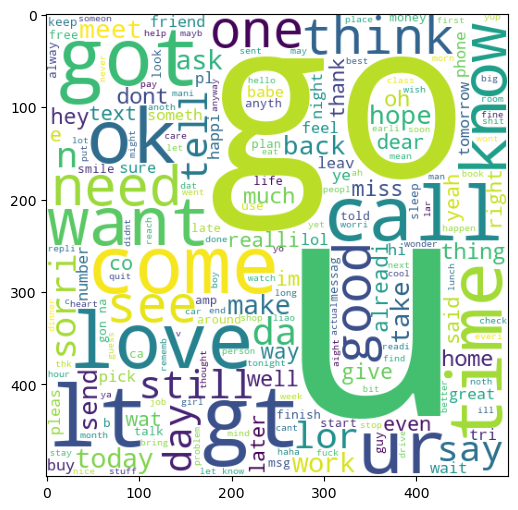

In [49]:
# Most frequent words in ham messages.
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

Similarly, In ham messages most common words are 'you','go','come','love','think','call','ok'.

In [50]:
# list of words in spam messages.
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [51]:
len(spam_corpus)

10106

In [52]:
# list of words in ham messages.
ham_corpus = []
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [53]:
len(ham_corpus)

35380

In [54]:
from collections import Counter
word_count = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [55]:
word_count.rename(columns={0:'words',1:'count'},inplace=True)
word_count

,words,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,102


<Axes: xlabel='words'>

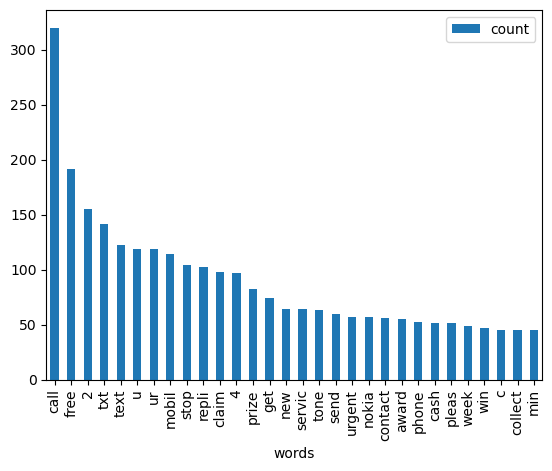

In [56]:
word_count.plot(kind='bar',x='words')

As the plot shows, most common words in spam messages are 'call','free','claim','win' and 'prize' kind of words.

In [57]:
valid_word_count = pd.DataFrame(Counter(ham_corpus).most_common(30))
valid_word_count.rename(columns={0:'words',1:'count'},inplace=True)
valid_word_count

,words,count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


<Axes: xlabel='words'>

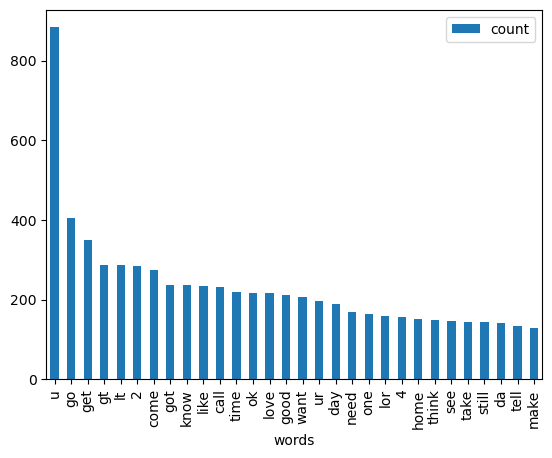

In [58]:
valid_word_count.plot(kind='bar',x='words')

Similarly In valid messages most common words are 'you','go','get','come', and 'love' kind of words.

# Model Building.

We will start with vectorizaion of text. As text can not be used directly for training a model. TFIDF-Vectorizer class from sklearn will be used for this vectorization.

In [59]:
data.head()

,target,text,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Count Vectorization :- 
1. Counts the most common words in text.
2. Check that for every data how many times these words appears.
3. This gives a 2D vector where evey row represents distinct data row and columns represents the number of words appears in that data.

Tfidf Vectorization :-
1. It works similar as count vertorizer, the main difference is that it gives weights to words which occur frequently in a particular sentence.
2. For example, it gives less weigth for word "the" as it appears more frequently in all sentence.

In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [61]:
X = tfidf.fit_transform(data['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
X.shape

(5168, 3000)

In [63]:
y = data['target']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5168, dtype: int32

We will import three different Naive Bayes Classifiers from scikit-learn, and check that which performs better.

In [64]:
# importing classifiers models from sklearn.
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [65]:
# Splliting data in train and test set in the ratio of 80:20.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [66]:
# Creating object of each classifier.
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
# Gaussian Naive Bayes Classifier.
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

In [79]:
print('accuracy :',accuracy_score(y_test,y_pred1))
print('precision_score:',precision_score(y_test,y_pred1))
print('confustion_matrix :\n',confusion_matrix(y_test,y_pred1))

accuracy : 0.8752417794970987
precision_score: 0.5277777777777778
confustion_matrix :
 [[791 102]
 [ 27 114]]


As the precision score shows that this is actually a very poor model.
Even though it has good accuracy but we need more precision as we want to maximize the number of True Positives.

In [69]:
# Multinomial Naive Bayes Classifier.
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)

In [70]:
print('accuracy :',accuracy_score(y_test,y_pred2))
print('precision_score:',precision_score(y_test,y_pred2))
print('confustion_matrix :\n',confusion_matrix(y_test,y_pred2))

accuracy : 0.9700193423597679
precision_score: 1.0
confustion_matrix :
 [[893   0]
 [ 31 110]]


This model actually works better than GaussionNB, as it has good accuracy score but also good precision score which is more important.

In [71]:
# Bernoulli Naive Bayes Classifier.
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)

In [72]:
print('accuracy :',accuracy_score(y_test,y_pred3))
print('precision_score:',precision_score(y_test,y_pred3))
print('confustion_matrix :\n',confusion_matrix(y_test,y_pred3))

accuracy : 0.9796905222437138
precision_score: 0.9918032786885246
confustion_matrix :
 [[892   1]
 [ 20 121]]


Comparing accuracy and precision score of Gaussian , Multinomial and Bernoulli Naive Bayes model.

In [73]:
compare = [[accuracy_score(y_test,y_pred1),precision_score(y_test,y_pred1)],
           [accuracy_score(y_test,y_pred2),precision_score(y_test,y_pred2)],
           [accuracy_score(y_test,y_pred3),precision_score(y_test,y_pred3)]]

In [74]:
compare_df = pd.DataFrame(compare)
compare_df.rename(index={0:'Gaussian',1:'Multinomial',2:'Bernoulli'},inplace=True)
compare_df.rename(columns={0:'Accuracy',1:'Precision'},inplace=True)
compare_df

,Accuracy,Precision
Gaussian,0.875242,0.527778
Multinomial,0.970019,1.000000
Bernoulli,0.979691,0.991803


<Axes: >

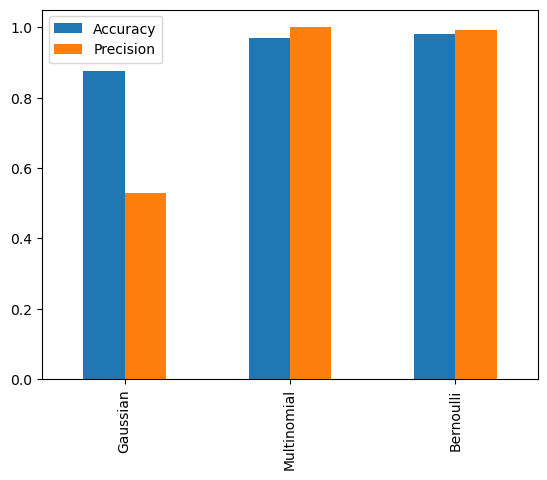

In [75]:
compare_df.plot(kind='bar')

From above plot it is clear that the MultinomialNB model has good accuracy as well as good precision. So we will use this model as out final model for prediction.

In [76]:
import pickle

In [77]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))